In [3]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows',1000)

In [4]:
train_data = pd.read_csv("final/train_data.csv", index_col = False, encoding = "utf-8")
test_data = pd.read_csv("final/test_data.csv", index_col = False, encoding = "utf-8")

In [5]:
# train_data에서 필요없는 컬럼 지우기

del train_data["영화명"]
del train_data["개봉일"]
del train_data["관객수"]
del train_data["매출액"]
del train_data["배우평균"]
del train_data["누적매출액"]
del train_data["대표국적"]
del train_data["배급사"]
del train_data["등급"]
del train_data["장르"]
del train_data["감독"]

In [6]:
# 모든 변수 사용하기
train_X = train_data.drop(["누적관객수"], axis = 1)
train_y = train_data["누적관객수"]
test_X = test_data.drop(["누적관객수"], axis = 1)
test_y = test_data["누적관객수"]

In [22]:
# 회귀분석

train_X = sm.add_constant(train_X, has_constant = "add")

multi_model = sm.OLS(train_y, train_X)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  누적관객수   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1378.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:03:50   Log-Likelihood:            -2.4472e+05
No. Observations:               17234   AIC:                         4.895e+05
Df Residuals:                   17197   BIC:                         4.898e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.376e+04   1.11e+04      3.952      0.000    2.21e+04    6.55e+04
스크린수       -1210.2216     38.017    -31.834      0.000   -1284.738   -1135.705
상영횟수          29.9108      0.519     57.620      0.000      28.893      30.928
감독값            0.1591      0.007     23.796      0.000       0.146       0.172
배급사값           0.2025      0.010     20.354      0.000       0.183       0.222
배우합            0.0324      0.002     13.963      0.000       0.028       0.037
SF         -5.938e+04   2.58e+04     -2.300      0.021    -1.1e+05   -8772.623
가족         -5.185e+04   3.52e+04     -1.472      0.141   -1.21e+05    1.72e+04
공연          -7.09e+04   2.96e+04     -2.393      0.017   -1.29e+05   -1.28e+04
공포         -2.366e+04   1.98e+04     -1.197      0.231   -6.24e+04    1.51e+04
느와르         1.702e+04   1.15e+05      0.148      0.882   -2.08e+05    2.42e+05
다큐멘터리      -4.162e+04   1.56e+04     -2.666      0.008   -7.22e+04    -1.1e+04
드라마        -4.009e+04   1.41e+04     -2.850      0.004   -6.77e+04   -1.25e+04
멜로로맨스      -2.258e+04   1.67e+04     -1.355      0.175   -5.52e+04    1.01e+04
모험         -1.392e+04   4.09e+04     -0.341      0.733   -9.41e+04    6.62e+04
무협         -1.676e+04    1.3e+05     -0.129      0.897   -2.72e+05    2.38e+05
뮤지컬        -3.944e+04   4.35e+04     -0.907      0.364   -1.25e+05    4.57e+04
미스터리       -7.216e+04   2.95e+04     -2.448      0.014    -1.3e+05   -1.44e+04
범죄          1.186e+04   2.21e+04      0.536      0.592   -3.15e+04    5.53e+04
사극          5.428e+05   4.93e+04     11.016      0.000    4.46e+05    6.39e+05
서부          2.244e+04   4.92e+04      0.456      0.649    -7.4e+04    1.19e+05
서사         -7.929e+04   2.42e+05     -0.328      0.743   -5.54e+05    3.95e+05
스릴러        -2.949e+04    2.1e+04     -1.405      0.160   -7.06e+04    1.17e+04
애니메이션       9537.2887   1.58e+04      0.603      0.547   -2.15e+04    4.05e+04
액션          2.571e+04   1.63e+04      1.573      0.116   -6321.477    5.78e+04
어드벤처       -5.126e+04   3.85e+04     -1.331      0.183   -1.27e+05    2.42e+04
에로         -2348.9958   2.25e+04     -0.104      0.917   -4.65e+04    4.18e+04
장르없음       -2.802e+04   1.54e+04     -1.817      0.069   -5.82e+04    2199.607
전쟁          2.149e+04   3.52e+04      0.611      0.541   -4.74e+04    9.04e+04
코미디         -2.76e+04   1.65e+04     -1.669      0.095      -6e+04    4807.574
판타지          6.33e+04   3.21e+04      1.974      0.048     453.877    1.26e+05
12세이상관람가    1.779e+04   7549.490      2.357      0.018    2993.349    3.26e+04
15세이상관람가   -8718.0221   6346.028     -1.374      0.170   -2.12e+04    3720.840
등급없음       -1.018e+04   6223.313     -1.635      0.102   -2.24e+04    2021.215
전체관람가       7.383e+04   8625.943      8.559      0.000    5.69e+04    9.07e+04
청소년관람불가    -2.896e+04   7071.408     -4.095      0.000   -4.28e+04   -1.51e+04
별점

In [8]:
train_data.columns

Index(['누적관객수', '스크린수', '상영횟수', '감독값', '배급사값', '배우합', 'SF', '가족', '공연', '공포',
       '느와르', '다큐멘터리', '드라마', '멜로로맨스', '모험', '무협', '뮤지컬', '미스터리', '범죄', '사극',
       '서부', '서사', '스릴러', '애니메이션', '액션', '어드벤처', '에로', '장르없음', '전쟁', '코미디',
       '판타지', '12세이상관람가', '15세이상관람가', '등급없음', '전체관람가', '청소년관람불가', '별점',
       '별점평가자수', '리뷰평가자수'],
      dtype='object')

# 변수 선언

In [24]:
# 모든변수 포함
train_X = train_data.drop(["누적관객수"], axis = 1)
train_y = np.log(train_data["누적관객수"])

test_X = test_data.drop(["누적관객수"], axis = 1)
test_y = test_data["누적관객수"]

# 1. Linear Regression

In [151]:
# 머신러닝

# for i in range(500):
#     X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state = i)

#     reg_model1 = LinearRegression()
#     reg_model1.fit(X_train, y_train)
    
#     print(i)
#     print("훈련 점수 : ", reg_model1.score(X_train, y_train))
#     print("테스트 점수 : ", reg_model1.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state = 107)

reg_model1 = LinearRegression()
reg_model1.fit(X_train, y_train)

print("훈련 점수 : ", reg_model1.score(X_train, y_train))
print("테스트 점수 : ", reg_model1.score(X_test, y_test))

pred1 = reg_model1.predict(test_X)
print("테스트 : ", r2_score(pred1, test_y))

훈련 점수 :  0.7656352066410017
테스트 점수 :  0.6865540359365996
테스트 :  0.6964196827489413


In [47]:
idxs = []
for idx, value in enumerate(pred1):
    idxs.append(idx)

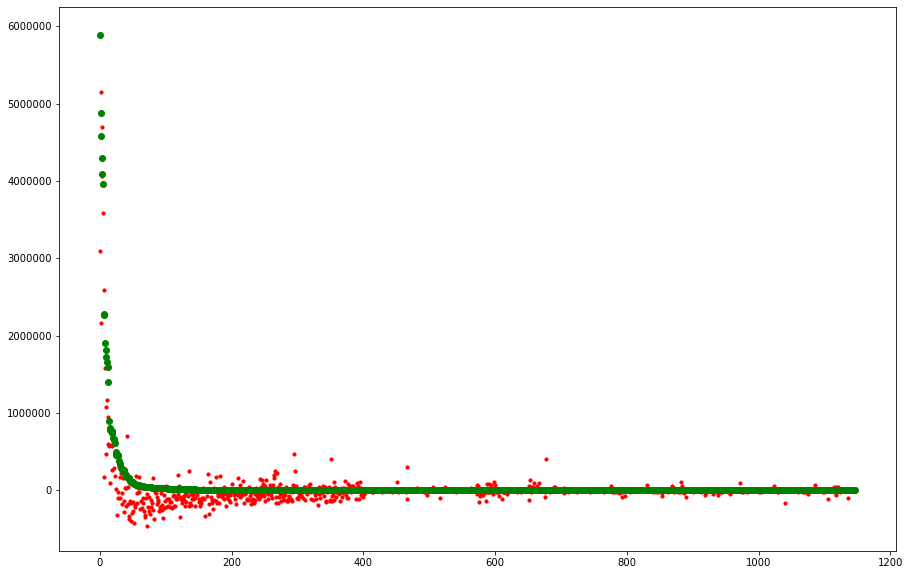

In [87]:
plt.figure(figsize = (15, 10))
plt.scatter(idxs, pred1, color = 'red', s = 10)
plt.scatter(idxs, test_y, color = 'green')
# plt.ylim(0, 1000000)

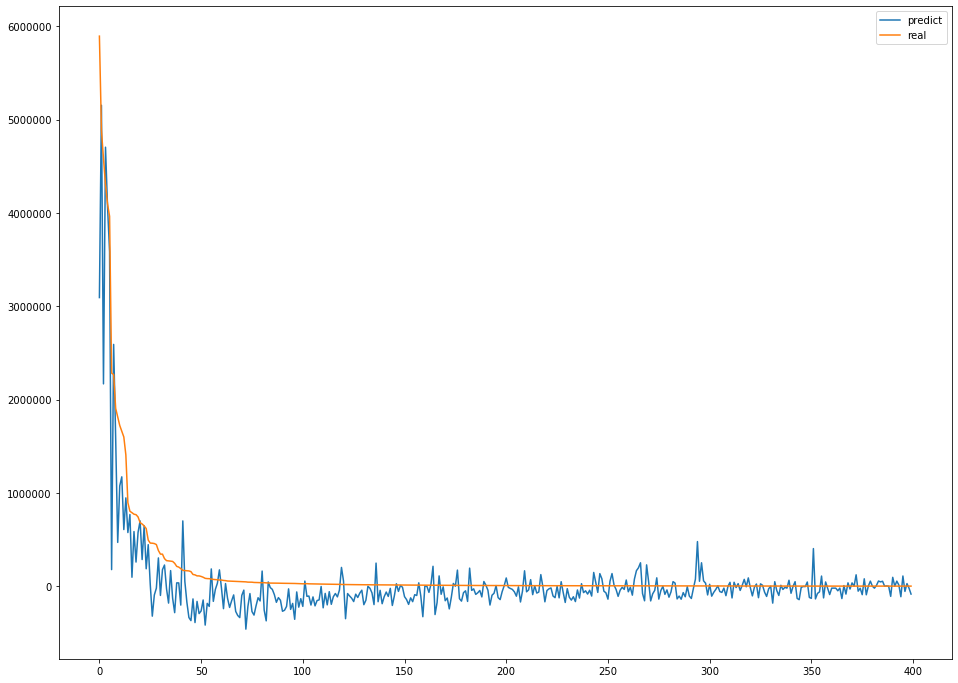

In [152]:
plt.figure(figsize=(16,12))
plt.plot(reg_model1.predict(test_X[:400]), label="predict")
plt.plot(test_y[:400].values.reshape(-1, 1), label="real")
plt.legend()

# 2. Ridge & Lasso

In [57]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [149]:
scaler = MinMaxScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.fit_transform(test_X)

In [31]:
# 정규화

train_X = train_data.drop(["누적관객수"], axis = 1)
train_y = train_data["누적관객수"]

test_X = test_data.drop(["누적관객수"], axis = 1)
test_y = test_data["누적관객수"] * 2

In [153]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state = 107)

reg_model2 = Ridge()
reg_model2.fit(X_train, y_train)

print("훈련 점수 : ", reg_model2.score(X_train, y_train))
print("테스트 점수 : ", reg_model2.score(X_test, y_test))

pred2 = reg_model1.predict(test_X)
print("테스트 : ", r2_score(pred2, test_y))

훈련 점수 :  0.7656347342845371
테스트 점수 :  0.6864865521503654
테스트 :  0.6964196827489413


C:\Users\dw\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.05743e-17): result may not be accurate.
  overwrite_a=True).T


In [59]:
idxs = []
for idx, value in enumerate(pred2):
    idxs.append(idx)

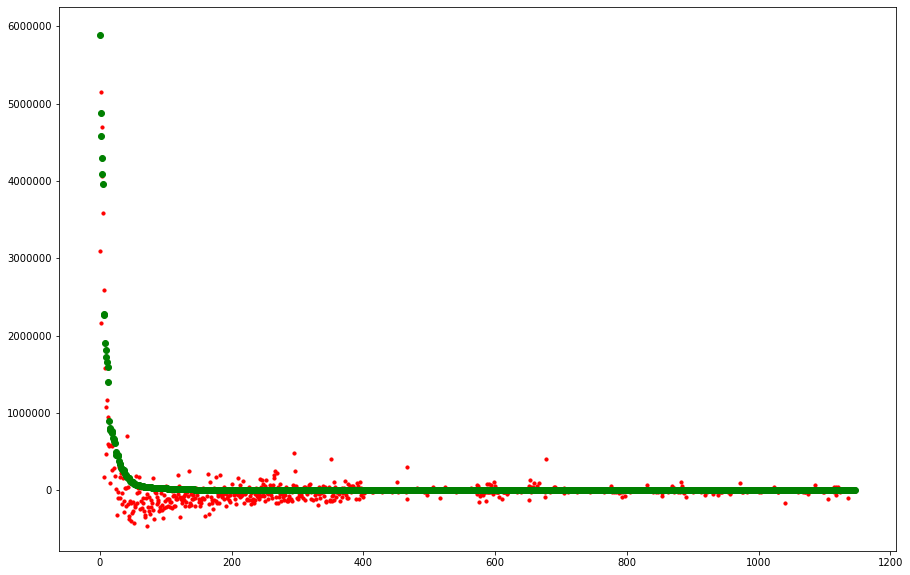

In [86]:
plt.figure(figsize = (15, 10))
plt.scatter(idxs, pred2, color = 'red', s = 10)
plt.scatter(idxs, test_y, color = 'green')
# plt.ylim(0, 1000000)

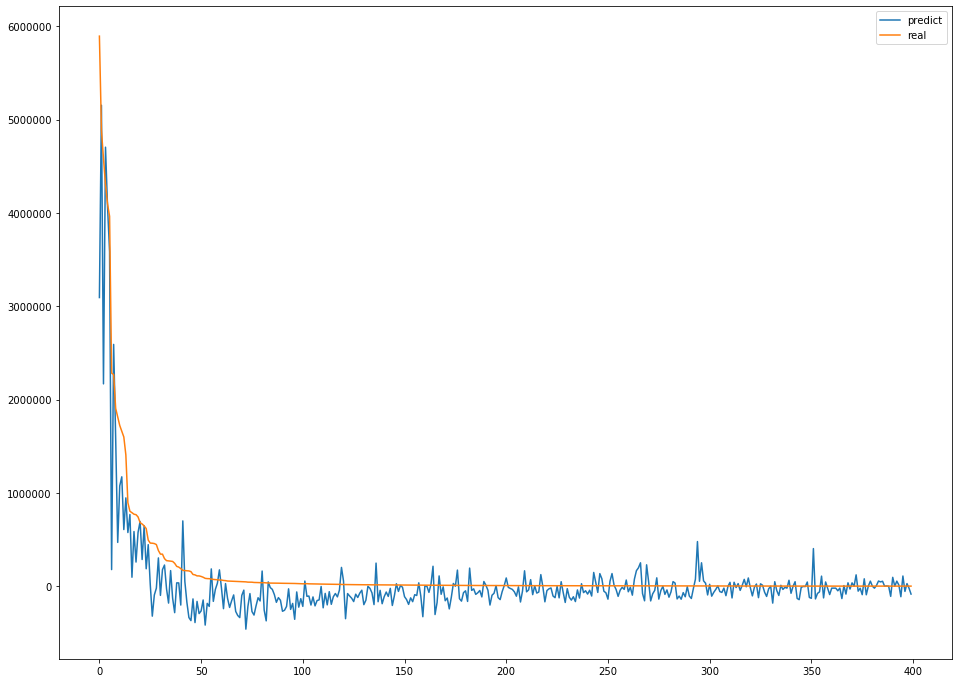

In [154]:
plt.figure(figsize=(16,12))
plt.plot(reg_model2.predict(test_X[:400]), label="predict")
plt.plot(test_y[:400].values.reshape(-1, 1), label="real")
plt.legend()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state = 107)

reg_model3 = Lasso()
reg_model3.fit(X_train, y_train)

print("훈련 점수 : ", reg_model3.score(X_train, y_train))
print("테스트 점수 : ", reg_model3.score(X_test, y_test))

pred3 = reg_model1.predict(test_X)
print("테스트 : ", r2_score(pred3, test_y))

훈련 점수 :  0.7656351576928512
테스트 점수 :  0.6865521533675251
테스트 :  0.6964196827489413


C:\Users\dw\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7664403419664.5, tolerance: 556448863595.2394
  positive)


In [62]:
idxs = []
for idx, value in enumerate(pred3):
    idxs.append(idx)

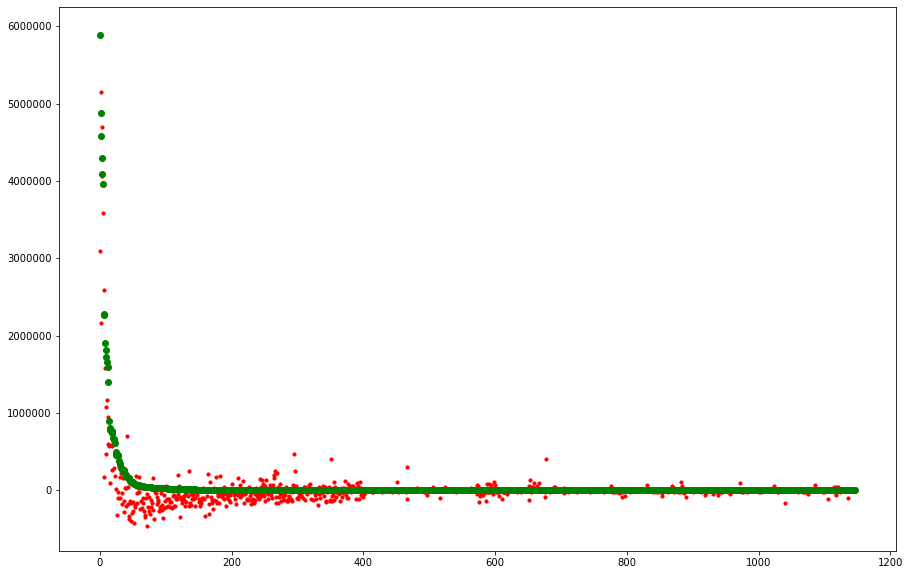

In [177]:
plt.figure(figsize = (15, 10))
plt.scatter(idxs, pred3, color = 'red', s = 10)
plt.scatter(idxs, test_y, color = 'green')
# plt.ylim(0, 100000)

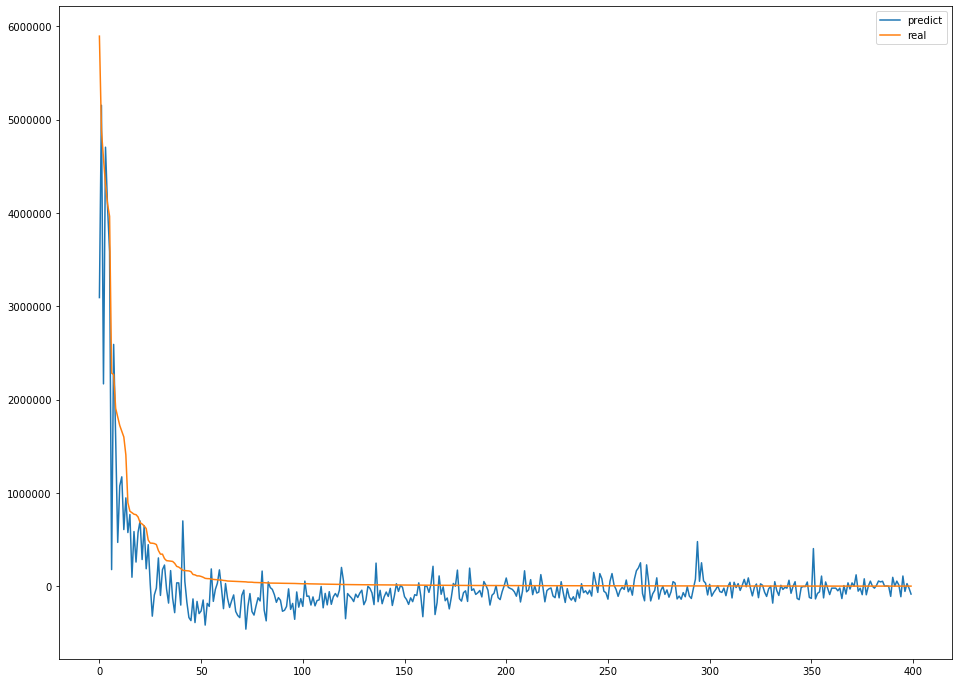

In [156]:
plt.figure(figsize=(16,12))
plt.plot(reg_model3.predict(test_X[:400]), label="predict")
plt.plot(test_y[:400].values.reshape(-1, 1), label="real")
plt.legend()

# 3. lgbm Regressor

In [89]:
# lgb 모델
model = lgb.LGBMRegressor(random_state=1, n_estimators=1000)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 2)

params = {'learning_rate': [1, 0.1, 0.01, 0.001, 0.005],
                'min_child_samples': [5, 10, 20]}

grid_model = GridSearchCV(estimator = model, param_grid = params,
                          scoring = 'r2', cv = 5, refit = True, verbose = 100)

grid_model.fit(X_train, y_train)

print("최적의 파라미터 : ", grid_model.best_params_)
print("최고 정확도 : ", grid_model.best_score_)
print(grid_model.score(X_test, y_test))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=1, min_child_samples=5 ............................
[CV]  learning_rate=1, min_child_samples=5, score=0.653, total=   0.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[CV] learning_rate=1, min_child_samples=5 ............................
[CV]  learning_rate=1, min_child_samples=5, score=0.600, total=   0.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[CV] learning_rate=1, min_child_samples=5 ............................
[CV]  learning_rate=1, min_child_samples=5, score=0.567, total=   0.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[CV] learning_rate=1, min_child_samples=5 ............................
[CV]  learning_rate=1, min_child_samples=5, score=0.365, total=   0.7s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

[CV]  learning_rate=0.01, min_child_samples=10, score=0.773, total=   0.9s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   30.6s remaining:    0.0s
[CV] learning_rate=0.01, min_child_samples=10 ........................
[CV]  learning_rate=0.01, min_child_samples=10, score=0.760, total=   0.9s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   31.5s remaining:    0.0s
[CV] learning_rate=0.01, min_child_samples=10 ........................
[CV]  learning_rate=0.01, min_child_samples=10, score=0.705, total=   0.8s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   32.4s remaining:    0.0s
[CV] learning_rate=0.01, min_child_samples=10 ........................
[CV]  learning_rate=0.01, min_child_samples=10, score=0.766, total=   0.8s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   33.2s remaining:    0.0s
[CV] learning_rate=0.01, min_child_samples=20 ........................
[CV]  learning_rate=0.01, min_child_samples=20, score=0.782, total=   0.9s
[Parallel(n_jobs=1)]:

[CV]  learning_rate=0.005, min_child_samples=20, score=0.752, total=   0.9s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:  1.0min remaining:    0.0s
[CV] learning_rate=0.005, min_child_samples=20 .......................
[CV]  learning_rate=0.005, min_child_samples=20, score=0.726, total=   0.9s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.0min finished
최적의 파라미터 :  {'learning_rate': 0.005, 'min_child_samples': 10}
최고 정확도 :  0.7684407716919972
0.777656966310746


In [91]:
# 모든변수 포함
train_X = train_data.drop(["누적관객수"], axis = 1)
train_y = train_data["누적관객수"]

test_X = test_data.drop(["누적관객수"], axis = 1)
test_y = test_data["누적관객수"]

In [99]:
model = lgb.LGBMRegressor(random_state=1, n_estimators= 1000)

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 14)

params = {'learning_rate': [0.005],
                'min_child_samples': [10]}

grid_model = GridSearchCV(estimator = model, param_grid = params,
                          scoring = 'r2', cv = 5, refit = True, verbose = 100)

grid_model.fit(X_train, y_train)

print("최적의 파라미터 : ", grid_model.best_params_)
print("최고 정확도 : ", grid_model.best_score_)
print(grid_model.score(X_test, y_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.005, min_child_samples=10 .......................
[CV]  learning_rate=0.005, min_child_samples=10, score=0.806, total=   0.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[CV] learning_rate=0.005, min_child_samples=10 .......................
[CV]  learning_rate=0.005, min_child_samples=10, score=0.834, total=   0.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[CV] learning_rate=0.005, min_child_samples=10 .......................
[CV]  learning_rate=0.005, min_child_samples=10, score=0.794, total=   0.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s
[CV] learning_rate=0.005, min_child_samples=10 .......................
[CV]  learning_rate=0.005, min_child_samples=10, score=0.738, total=   0.8s
[Parallel(n_jobs=1)]: Done   4 o

In [114]:
pred4 = grid_model.predict(test_X) / 2
r2_score(pred4, test_y)

0.850288154651378

In [75]:
for i in range(len(pred4)):
    if pred4[i]<0:
        print( pred4[i].round(2))

-37079.67
-51998.33


In [72]:
cnt = 0
for i in range(len(pred4)):
        if float(abs(pred4[i] - test_y[i]))  < 200000:
            cnt += 1
        
print(cnt / len(test_y))

0.987794245858762


In [67]:
idxs = []
for idx, value in enumerate(pred4):
    idxs.append(idx)

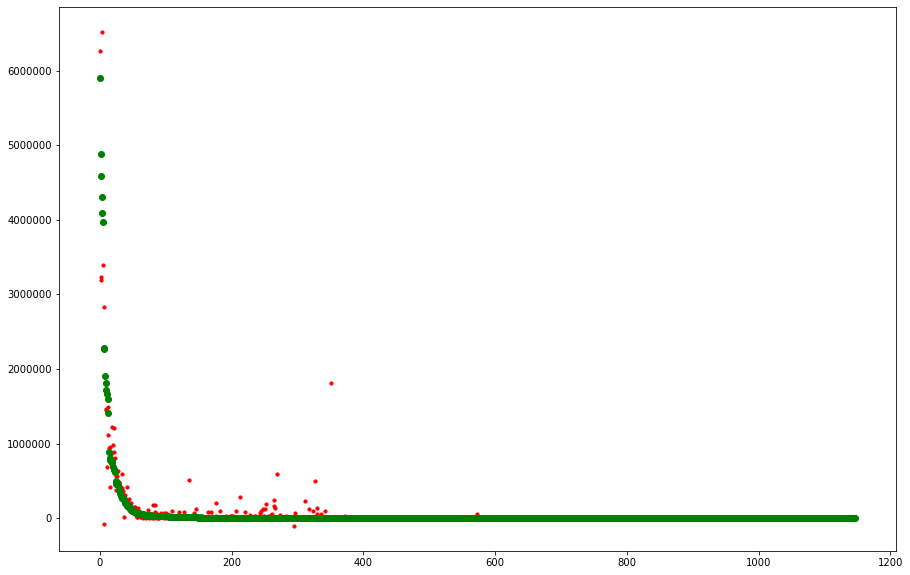

In [178]:
plt.figure(figsize = (15, 10))
plt.scatter(idxs, pred4, color = 'red', s = 10)
plt.scatter(idxs, test_y, color = 'green')
# plt.ylim(0, 100000)

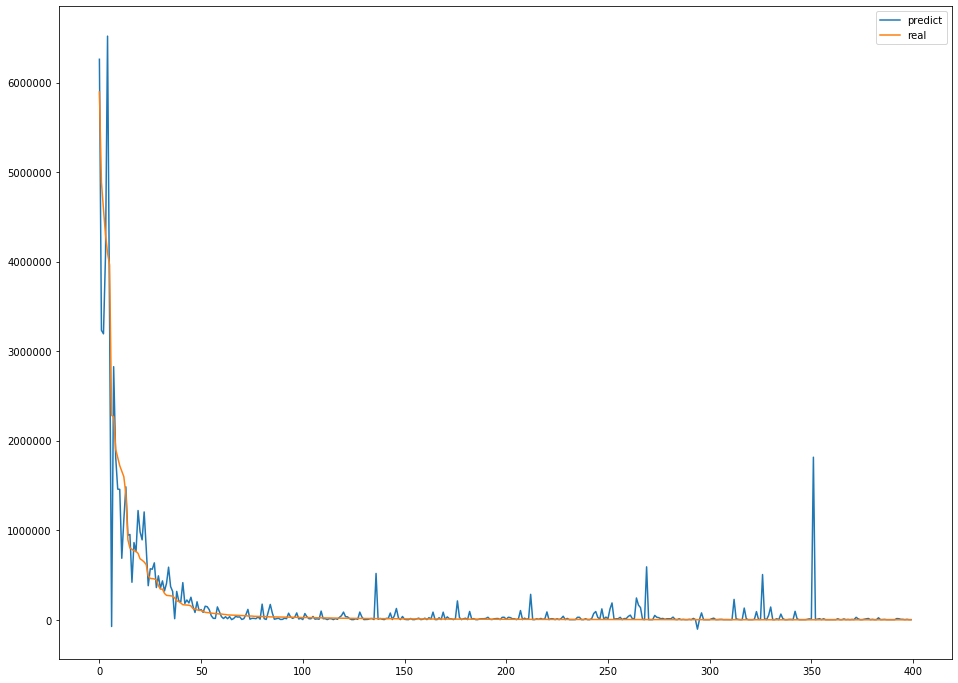

In [149]:
plt.figure(figsize=(16,12))
plt.plot(grid_model.predict(test_X[:400]), label="predict")
plt.plot(test_y[:400].values.reshape(-1, 1), label="real")
plt.legend()

# 4. XGB

In [88]:
# xgboost 모델
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 14)

xgb_model= xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 1, 
                             learning_rate = 0.005, max_depth = 6, 
                             min_child_weight = 18, n_estimators = 1000,
                             subsample = 0.4,
                             random_state = 4, nthread = -1,
                             scale_pos_weight = 1)

xgb_model.fit(X_train, y_train)

print("훈련",xgb_model.score(X_train, y_train))
print("테스트",xgb_model.score(X_test, y_test))

훈련 0.8023248138177516
테스트 0.7749478064408479


In [170]:
pred5 = xgb_model.predict(test_X)
r2_score(pred5, test_y)

0.8368983406796369

In [171]:
idxs = []
for idx, value in enumerate(pred5):
    idxs.append(idx)

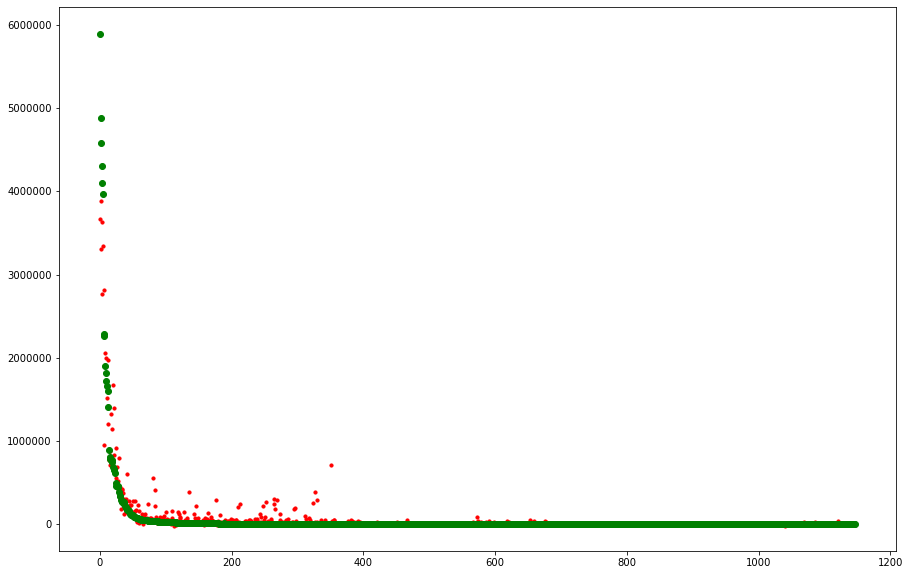

In [179]:
plt.figure(figsize = (15, 10))
plt.scatter(idxs, pred5, color = 'red', s = 10)
plt.scatter(idxs, test_y, color = 'green')
# plt.ylim(0, 100000)

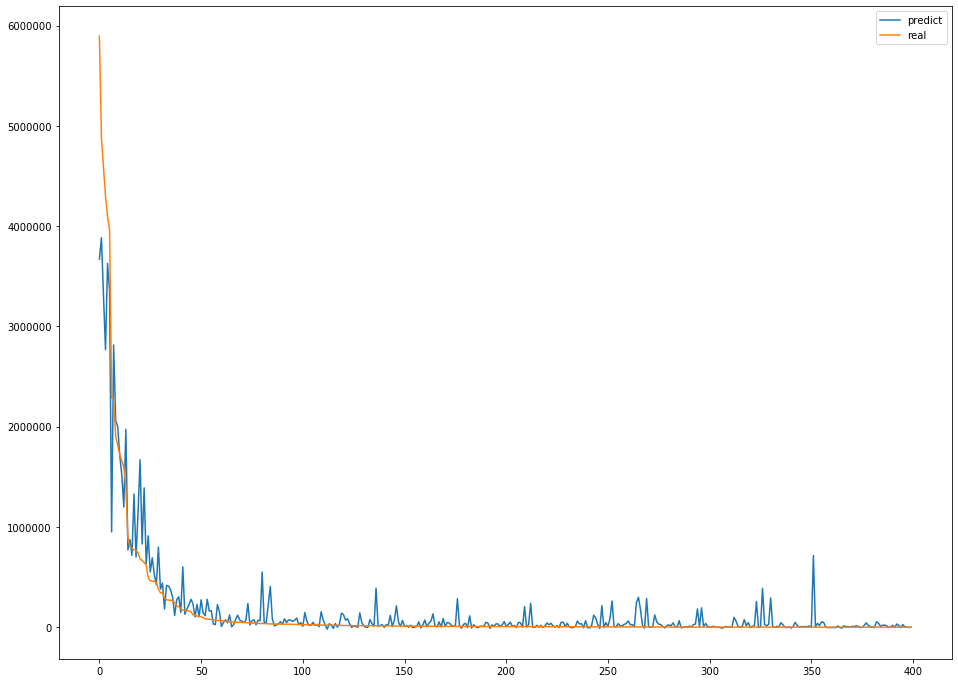

In [148]:
plt.figure(figsize=(16,12))
plt.plot(xgb_model.predict(test_X[:400]), label="predict")
plt.plot(test_y[:400].values.reshape(-1, 1), label="real")
plt.legend()

# 5. Random Forest

In [94]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 14)

# estimator = RandomForestRegressor(n_estimators=1000, bootstrap=True, criterion='r2', 
#                                   max_depth=2, max_leaf_nodes=10, min_samples_split=2, 
#                                   min_samples_leaf=3, max_features="auto")

ramdom_model = RandomForestRegressor(n_estimators = 1000)
ramdom_model.fit(X_train, y_train)

print(ramdom_model.score(X_train, y_train))
print(ramdom_model.score(X_test, y_test))

0.969669050227066
0.7835806293375693


In [95]:
pred6 = ramdom_model.predict(test_X)
r2_score(pred6, test_y)

0.8709477957285099

In [96]:
idxs = []
for idx, value in enumerate(pred6):
    idxs.append(idx)

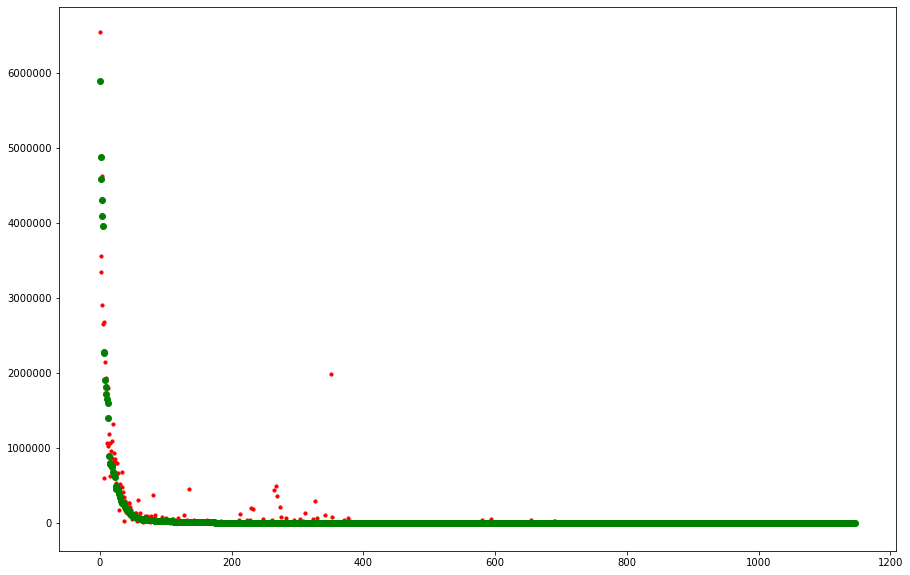

In [180]:
plt.figure(figsize = (15, 10))
plt.scatter(idxs, pred6, color = 'red', s = 10)
plt.scatter(idxs, test_y, color = 'green')
# plt.ylim(0, 100000)

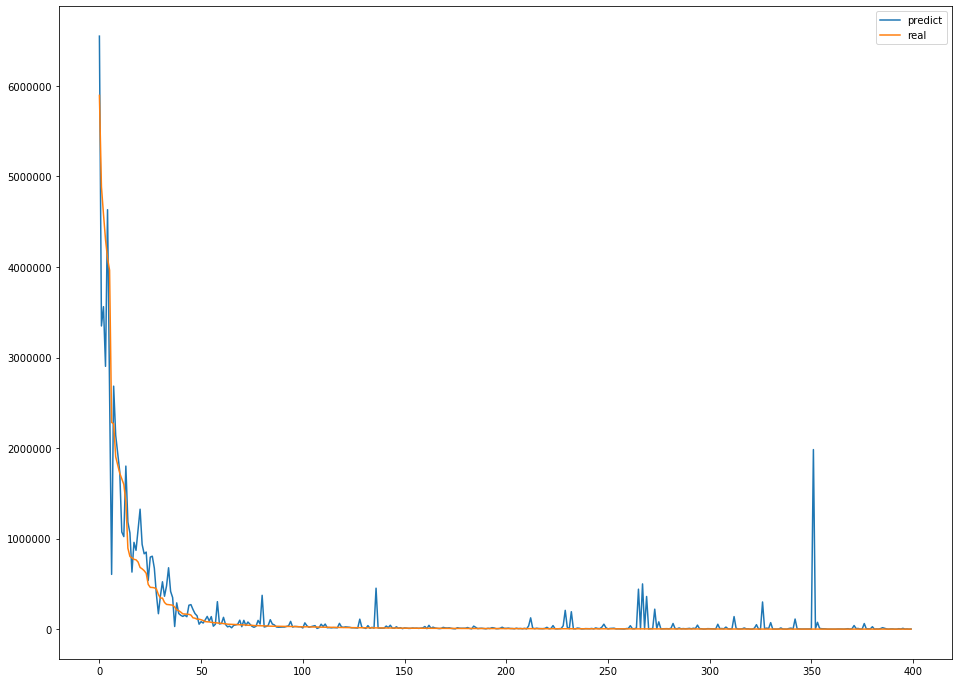

In [147]:
plt.figure(figsize=(16,12))
plt.plot(ramdom_model.predict(test_X[:400]), label="predict")
plt.plot(test_y[:400].values.reshape(-1, 1), label="real")
plt.legend()

In [ ]:
cnt = 0
for i in range(len(preds)):
    if float(abs(preds[i] - test_y[i]))  < 50000:
        cnt += 1
#     else:
#         print(i, round(preds[i] - test_y[i]))
        
print(cnt / len(test_y))